### Import libraries

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt

### Import Dataset

In [14]:
df_hp = pd.read_csv('handphone.csv')
display(df_hp.head()) 
df_hp.shape

,Handphone,Baterai,Kamera,Harga,Layak_Direkomendasikan
0,H1,Kuat,Tinggi,Sangat Murah,Ya
1,H2,Kuat,Tinggi,Sangat Mahal,Ya
2,H3,Kuat,Sedang,Mahal,Ya
3,H4,Kuat,Rendah,Mahal,Tidak
4,H5,Cukup,Tinggi,Sangat Murah,Ya


(14, 5)

### Menentukan atribut bebas dan atribut target

In [15]:
fitur = ['Baterai', 'Kamera', 'Harga']

X = pd.get_dummies(df_hp[fitur], prefix=['Baterai', 'Kamera', 'Harga'])
y = df_hp['Layak_Direkomendasikan']
display(X)

,Baterai_Cukup,Baterai_Kuat,Baterai_Lemah,Kamera_Rendah,Kamera_Sedang,Kamera_Tinggi,Harga_Mahal,Harga_Murah,Harga_Sangat Mahal,Harga_Sangat Murah
0,0,1,0,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0
3,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1
5,1,0,0,0,1,0,1,0,0,0
6,1,0,0,0,1,0,0,0,1,0
7,1,0,0,0,0,1,0,1,0,0
8,1,0,0,1,0,0,1,0,0,0
9,0,0,1,0,0,1,0,0,0,1


### Decision Tree Classifier menggunakan entropy

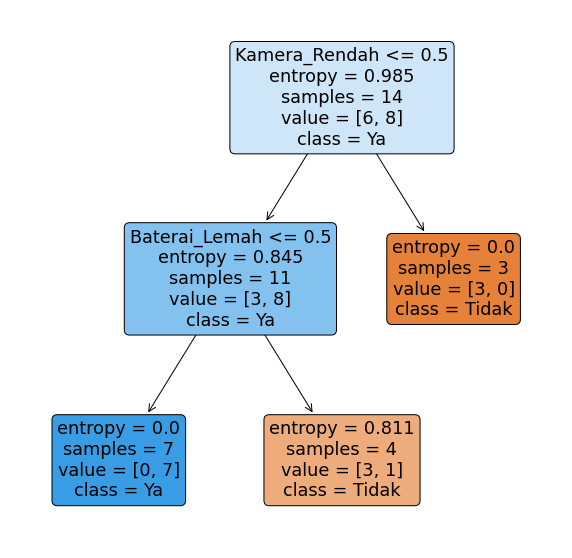

|--- Kamera_Rendah <= 0.50
|   |--- Baterai_Lemah <= 0.50
|   |   |--- class: Ya
|   |--- Baterai_Lemah >  0.50
|   |   |--- class: Tidak
|--- Kamera_Rendah >  0.50
|   |--- class: Tidak



In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 
# Membuat objek decision tree
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

# Train Model
clf_tree = clf_tree.fit(X.values, y)

# Decision Tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_tree, feature_names=X.columns, class_names=y.sort_values().unique(),
              filled=True, rounded=True)
plt.show()

# Ekstrak aturan dari decision tree
aturan = tree.export_text(clf_tree, feature_names=list(X.columns))
print(aturan)

### Prediksi


In [44]:
# HP15 : Baterai : Cukup, Kamera : Rendah, Harga : Sangat Mahal
pred_rekomendasi = clf_tree.predict([[1,0,0,1,0,0,0,0,1,0]])
print('Prediksi Rekomendasi HP15 : ', pred_rekomendasi)

# HP16 : Baterai : Cukup, Kamera : Tinggi, Harga : Mahal
pred_rekomendasi = clf_tree.predict([[1,0,0,0,0,1,1,0,0,0]])
print('Prediksi Rekomendasi HP16 : ', pred_rekomendasi)

Prediksi Rekomendasi HP15 :  ['Tidak']
Prediksi Rekomendasi HP16 :  ['Ya']


### Decision Tree dengan Variabel Numerik

### Import library dan dataset

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

df_football = pd.read_csv('football.csv')
display(df_football.head()) 
df_football.shape

,weather,temperature,humidity,wind,play
0,Sunny,35,85,False,Not Play
1,Sunny,32,90,True,Not Play
2,Cloudy,33,78,False,Play
3,Rainy,26,96,False,Play
4,Rainy,25,80,False,Play


(14, 5)

### Atribut bebas dan target

In [20]:
fitur=['weather', 'temperature', 'humidity', 'wind']
X = pd.get_dummies(df_football[fitur], prefix=['weather','wind'], columns=['weather','wind'])
y = df_football.play
display(X)

,temperature,humidity,weather_Cloudy,weather_Rainy,weather_Sunny,wind_False,wind_True
0,35,85,0,0,1,1,0
1,32,90,0,0,1,0,1
2,33,78,1,0,0,1,0
3,26,96,0,1,0,1,0
4,25,80,0,1,0,1,0
5,23,70,0,1,0,0,1
6,22,65,1,0,0,0,1
7,27,95,0,0,1,1,0
8,26,70,0,0,1,1,0
9,29,80,0,1,0,1,0


### Decision Tree Classifier dengan Gini Index

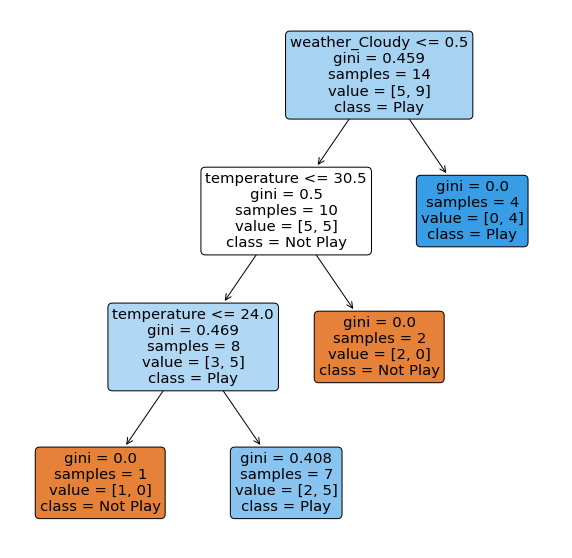

|--- weather_Cloudy <= 0.50
|   |--- temperature <= 30.50
|   |   |--- temperature <= 24.00
|   |   |   |--- class: Not Play
|   |   |--- temperature >  24.00
|   |   |   |--- class: Play
|   |--- temperature >  30.50
|   |   |--- class: Not Play
|--- weather_Cloudy >  0.50
|   |--- class: Play



In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 
# Membuat objek decision tree
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Train Model
clf_tree = clf_tree.fit(X.values, y)

# Decision Tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_tree, feature_names=X.columns, class_names=y.sort_values().unique(),
              filled=True, rounded=True)
plt.show()

# Ekstrak aturan dari decision tree
aturan = tree.export_text(clf_tree, feature_names=list(X.columns))
print(aturan)

### Prediksi

In [8]:
# Play15 : weather : Sunny, temp : 37 , humidity : 90 , wind : False 
pred_rekomendasi = clf_tree.predict([[37,90,0,0,1,1,0]])
print('Prediksi Play15 : ', pred_rekomendasi)

# Play16 : weather : Cloudy, temp : 27 , humidity : 70 , wind : True
pred_rekomendasi = clf_tree.predict([[28,70,1,0,0,0,1]])
print('Prediksi Play16 : ', pred_rekomendasi)

Prediksi Play15 :  ['Not Play']
Prediksi Play16 :  ['Play']
